<a href="https://colab.research.google.com/github/Machocho254/Week-4-IP/blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2019_11_Machocho_Mengo_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTOLIB DATA CLEANING AND ANALYSIS**

# 

# Requirement
Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

Additional questions to answer:

1.   What is the most popular hour for returning cars?
2.   What station is the most popular?
3.   What postal code is the most popular for picking up Bluecars?


# **Data**

The data for this project has been provided as below:
http://bit.ly/autolib_dataset
Both the dataset and the description given for the data has been uploaded


# **Importing Essential Libraries**

In [0]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical Processing on arrays and matrices
import matplotlib.pyplot as plt #Generating visualizations
import seaborn as sns #Visualizations based on matplot lib
import pandas_profiling as pp
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

# **Data Uploading**

In [2]:
# uploading the dataset 
# Downloaded the dataset from the link given above and uploading onto the notebook

df_autolib = pd.read_csv('/content/Autolib_dataset (2).csv')
df_autolib.head()


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [5]:
# check the number of rows and columns
df_autolib.shape

(5000, 25)

In [6]:
#Display Sample records to validate records successfully imported 
pd.set_option('display.max_rows', 100)
df_autolib

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27


In [7]:
# To display the information about the dataset
df_autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
Address                5000 non-null object
Cars                   5000 non-null int64
Bluecar counter        5000 non-null int64
Utilib counter         5000 non-null int64
Utilib 1.4 counter     5000 non-null int64
Charge Slots           5000 non-null int64
Charging Status        5000 non-null object
City                   5000 non-null object
Displayed comment      111 non-null object
ID                     5000 non-null object
Kind                   5000 non-null object
Geo point              5000 non-null object
Postal code            5000 non-null int64
Public name            5000 non-null object
Rental status          5000 non-null object
Scheduled at           47 non-null object
Slots                  5000 non-null int64
Station type           5000 non-null object
Status                 5000 non-null object
Subscription status    5000 non-null object
year                   

# **Data Understanding**

# Data Structure
Exploration of:

1. Dataset information. To check total counts per column, not null constraints and data types
2. Dataset description.
3. Distinct values per column to identify categorical values
4. Null values per column to identify missing values





In [8]:
#Dataframe Information to check data types, not null constraints
print(df_autolib.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
Address                5000 non-null object
Cars                   5000 non-null int64
Bluecar counter        5000 non-null int64
Utilib counter         5000 non-null int64
Utilib 1.4 counter     5000 non-null int64
Charge Slots           5000 non-null int64
Charging Status        5000 non-null object
City                   5000 non-null object
Displayed comment      111 non-null object
ID                     5000 non-null object
Kind                   5000 non-null object
Geo point              5000 non-null object
Postal code            5000 non-null int64
Public name            5000 non-null object
Rental status          5000 non-null object
Scheduled at           47 non-null object
Slots                  5000 non-null int64
Station type           5000 non-null object
Status                 5000 non-null object
Subscription status    5000 non-null object
year                   

In [9]:
#Descriptive statistics
df_autolib.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [11]:
#Describer Non Integer variables
df_cat = df_autolib.dtypes[df_autolib.dtypes == 'object'].index
df_autolib[df_cat].describe()

,Address,Charging Status,City,Displayed comment,ID,Kind,Geo point,Public name,Rental status,Scheduled at,Station type,Status,Subscription status
count,5000,5000,5000,111,5000,5000,5000,5000,5000,47,5000,5000,5000
unique,1104,3,88,25,1105,4,1105,1105,4,8,3,3,3
top,8 Avenue de la Porte de Montrouge,nonexistent,Paris,"Station en parking (niv -2), accÃ¨s 4 av. Foch",paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",Paris/Porte de Montrouge/8,operational,2016-07-27T15:32:21,station,ok,nonexistent
freq,13,2886,2816,8,13,4388,13,13,4618,10,4615,4623,4593


In [12]:
#Unique values for each column.
for col in list(df_autolib):
    print(col)
    print(df_autolib[col].unique())

Address
['2 Avenue de Suffren' '145 Rue Raymond Losserand'
 '2 Avenue John Fitzgerald Kennedy' ... '106 rue VercingÃ©torix'
 '134 boulevard National' '54 Boulevard SÃ©rurier']
Cars
[0 6 3 1 5 4 2 7]
Bluecar counter
[0 6 3 1 5 4 2 7]
Utilib counter
[0 1 2]
Utilib 1.4 counter
[0 2 1 3]
Charge Slots
[0 1 2]
Charging Status
['nonexistent' 'operational' 'broken']
City
['Paris' 'Le Bourget' 'Nanterre' 'Puteaux' 'Fontenay-aux-Roses'
 'Le Chesnay' 'Suresnes' 'Versailles' 'Malakoff' 'Issy-les-Moulineaux'
 'Saint-Cloud' 'SÃ¨vres' 'Bezons' 'Nogent-sur-Marne' 'CrÃ©teil'
 'Villejuif' 'Rueil-Malmaison' 'Villeneuve-la-Garenne' 'Montreuil'
 'Charenton-le-Pont' 'Courbevoie' 'AsniÃ¨res-sur-Seine' 'Garches' 'Drancy'
 'La Garenne-Colombes' 'VerriÃ¨res-le-Buisson' 'Le Blanc-Mesnil' 'Vanves'
 'Enghien-les-Bains' 'Sceaux' 'Levallois-Perret' 'Boulogne-Billancourt'
 'ChÃ¢tenay-Malabry' 'Pantin' 'Meudon' 'Gennevilliers' 'Vincennes'
 'Rungis' 'Colombes' 'Fontenay-Sous-Bois' 'Rosny-sous-Bois'
 'Bourg-la-Reine' 'C

In [13]:
#Unique values for each column.
df_autolib.nunique()

Address                1104
Cars                      8
Bluecar counter           8
Utilib counter            3
Utilib 1.4 counter        4
Charge Slots              3
Charging Status           3
City                     88
Displayed comment        25
ID                     1105
Kind                      4
Geo point              1105
Postal code             107
Public name            1105
Rental status             4
Scheduled at              8
Slots                     8
Station type              3
Status                    3
Subscription status       3
year                      1
month                     1
day                       9
hour                     24
minute                   60
dtype: int64

# Data Preparation
Data Cleaning:


1.   Checking for and removing outliers
2.   Checking for missing values



In [14]:
# To get the count of non - missing values in the df dataframe
#
df_autolib.count()

Address                5000
Cars                   5000
Bluecar counter        5000
Utilib counter         5000
Utilib 1.4 counter     5000
Charge Slots           5000
Charging Status        5000
City                   5000
Displayed comment       111
ID                     5000
Kind                   5000
Geo point              5000
Postal code            5000
Public name            5000
Rental status          5000
Scheduled at             47
Slots                  5000
Station type           5000
Status                 5000
Subscription status    5000
year                   5000
month                  5000
day                    5000
hour                   5000
minute                 5000
dtype: int64

In [15]:
# To determine the no. of missing values 
# 
num_rows = df_autolib.shape[0]
num_missing = num_rows - df_autolib.count() 
num_missing

# Drop the "Displayed comment" and "scheduled at" columns

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [16]:
# Then count those missing values in our dataframe
#
np.count_nonzero(df_autolib.isnull())

9842

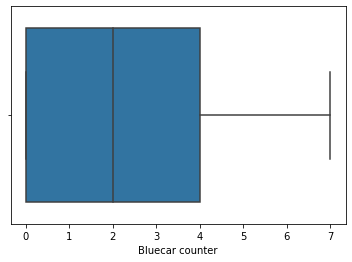

In [18]:
# To check for outliers using boxplots
# 
sns.boxplot(x = df_autolib['Bluecar counter'])

In [19]:
# To sort the data for the city of Paris only
# To sort data for the City of Paris only
autolib_Paris = df_autolib[(df_autolib['City'] == "Paris")]
autolib_Paris

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,NaN,paris-ivry-3,STATION,"48.82175, 2.36868",75013,Paris/Ivry/3,operational,NaN,6,station,ok,nonexistent,2018,4,9,23,1
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,NaN,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,NaN,1,station,ok,nonexistent,2018,4,1,20,49
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1


In [20]:
# merging the year. month, day, hour and minute
autolib_Paris['Data_Timestamp']=pd.to_datetime(autolib_Paris[['day','month','year','hour','minute']])
autolib_Paris

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,Data_Timestamp
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2,2018-04-06 07:02:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,3 avenue d'Ivry,0,0,0,0,2,operational,Paris,NaN,paris-ivry-3,STATION,"48.82175, 2.36868",75013,Paris/Ivry/3,operational,NaN,6,station,ok,nonexistent,2018,4,9,23,1,2018-04-09 23:01:00
4994,15 rue de Rocroy,0,0,0,0,0,operational,Paris,NaN,paris-rocroy-15,STATION,"48.8801236, 2.3509617",75010,Paris/Rocroy/15,operational,NaN,1,station,ok,nonexistent,2018,4,1,20,49,2018-04-01 20:49:00
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56,2018-04-04 16:56:00
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1,2018-04-01 07:01:00


In [21]:
# To group the data by city, id, data_timestamp, hour
autolib_Paris =  autolib_Paris.groupby(['City', 'ID','Data_Timestamp','hour']).sum()
autolib_Paris.head(10)

Cars  ...  minute
City  ID                 Data_Timestamp      hour        ...        
Paris paris-25aout1944-8 2018-04-01 18:40:00 18       1  ...      40
                         2018-04-02 07:37:00 7        4  ...      37
                         2018-04-02 12:49:00 12       2  ...      49
                         2018-04-04 03:10:00 3        3  ...      10
                         2018-04-04 18:48:00 18       1  ...      48
                         2018-04-07 21:18:00 21       1  ...      18
                         2018-04-09 05:23:00 5        0  ...      23
                         2018-04-09 20:53:00 20       1  ...      53
      paris-adolphemax-6 2018-04-02 11:01:00 11       4  ...       1
                         2018-04-07 16:47:00 16       0  ...      47

[10 rows x 11 columns]

In [0]:
# To display max number of columns in a dataframe

pd.set_option('display.max_columns', 20)

# Data Analysis

In [23]:
# Getting the difference in records for Bluecar 
autolib_Paris['diff'] = autolib_Paris.groupby(['ID'])['Bluecar counter'].apply(lambda x:  x- x.shift(1))
autolib_Paris['diff']
autolib_Paris.head(20)


Cars  Bluecar counter  \
City  ID                   Data_Timestamp      hour                          
Paris paris-25aout1944-8   2018-04-01 18:40:00 18       1                1   
                           2018-04-02 07:37:00 7        4                4   
                           2018-04-02 12:49:00 12       2                2   
                           2018-04-04 03:10:00 3        3                3   
                           2018-04-04 18:48:00 18       1                1   
                           2018-04-07 21:18:00 21       1                1   
                           2018-04-09 05:23:00 5        0                0   
                           2018-04-09 20:53:00 20       1                1   
      paris-adolphemax-6   2018-04-02 11:01:00 11       4                4   
                           2018-04-07 16:47:00 16       0                0   
                           2018-04-08 13:56:00 13       0                0   
      paris-adolphemille-8 2018-04-01 01:53:00 1        1                1   
                           2018-04-03 12:25:00 12       2                2   
                           2018-04-03 21:53:00 21       4                4   
                           2018-04-04 18:23:00 18       2                2   
                           2018-04-08 01:02:00 1        0                0   
                           2018-04-09 00:33:00 0        0                0   
                           2018-04-09 00:56:00 0        1                1   
      paris-adolpheyvon-6  2018-04-01 20:28:00 20       4                4   
                           2018-04-02 14:15:00 14       5                5   

                                                     Utilib counter  \
City  ID                   Data_Timestamp      hour                   
Paris paris-25aout1944-8   2018-04-01 18:40:00 18                 0   
                           2018-04-02 07:37:00 7                  0   
                           2018-04-02 12:49:00 12                 0   
                           2018-04-04 03:10:00 3                  0   
                           2018-04-04 18:48:00 18                 0   
                           2018-04-07 21:18:00 21                 0   
                           2018-04-09 05:23:00 5                  0   
                           2018-04-09 20:53:00 20                 0   
      paris-adolphemax-6   2018-04-02 11:01:00 11                 0   
                           2018-04-07 16:47:00 16                 0   
                           2018-04-08 13:56:00 13                 0   
      paris-adolphemille-8 2018-04-01 01:53:00 1                  0   
                           2018-04-03 12:25:00 12                 0   
                           2018-04-03 21:53:00 21                 0   
                           2018-04-04 18:23:00 18                 0   
                           2018-04-08 01:02:00 1                  0   
                           2018-04-09 00:33:00 0                  0   
                           2018-04-09 00:56:00 0                  0   
      paris-adolpheyvon-6  2018-04-01 20:28:00 20                 0   
                           2018-04-02 14:15:00 14                 0   

                                                     Utilib 1.4 counter  \
City  ID                   Data_Timestamp      hour                       
Paris paris-25aout1944-8   2018-04-01 18:40:00 18                     0   
                           2018-04-02 07:37:00 7                      0   
                           2018-04-02 12:49:00 12                     0   
                           2018-04-04 03:10:00 3                      0   
                           2018-04-04 18:48:00 18                     0   
                           2018-04-07 21:18:00 21                     1   
                           2018-04-09 05:23:00 5                      0   
                           2018-04-09 20:53:00 20                     1   
      paris-adolphemax-

In [24]:
# To sort the difference data in ascending order
Autolib3  = autolib_Paris['diff'].sort_values(ascending = True)
Autolib3.head(15)

City   ID                               Data_Timestamp       hour
Paris  paris-grenelle-37                2018-04-08 15:57:00  15     -6.0
       paris-courcelles-210             2018-04-08 12:01:00  12     -6.0
       paris-madeleinetronchet-parking  2018-04-07 22:35:00  22     -6.0
       paris-pyrenees-356               2018-04-08 17:06:00  17     -6.0
       paris-tronchet-19                2018-04-08 21:20:00  21     -6.0
       paris-portedemontrouge-8         2018-04-05 14:09:00  14     -6.0
       paris-anvers-parking             2018-04-06 04:26:00  4      -6.0
       paris-colonelpierreavia-1        2018-04-07 22:52:00  22     -6.0
       paris-georgesmandel-42           2018-04-03 02:23:00  2      -6.0
       paris-richardlenoir-110          2018-04-07 11:47:00  11     -6.0
       paris-doudeauville-29            2018-04-06 13:57:00  13     -6.0
       paris-goubet-8                   2018-04-07 18:36:00  18     -6.0
       paris-lafayette-7                2018-04-07 04:25:0

In [25]:
#Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018
autolib_pick = autolib_Paris[(autolib_Paris['diff'] < 0)].groupby(['hour'])['diff'].sum().sort_values(ascending =True).head(10)
print(autolib_pick)
autolib_pick.iloc[:1]

hour
21   -109.0
18    -91.0
17    -88.0
22    -88.0
10    -81.0
16    -78.0
23    -76.0
20    -75.0
8     -73.0
4     -71.0
Name: diff, dtype: float64


hour
21   -109.0
Name: diff, dtype: float64

In [26]:
#Identify the most popular hour of the day for returning a shared electric car (Bluecar) in the city of Paris over the month of April 2018
autolib_return = autolib_Paris[(autolib_Paris['diff'] > 0)].groupby(['hour'])['diff'].sum().sort_values(ascending =False).head(10)
print(autolib_return)
autolib_return.iloc[:1]

hour
12    104.0
9     101.0
3      85.0
21     83.0
2      82.0
6      73.0
11     70.0
22     70.0
16     69.0
19     68.0
Name: diff, dtype: float64


hour
12    104.0
Name: diff, dtype: float64

In [27]:
# To identify the most popular station 
pop_station = autolib_Paris.groupby(['ID'])['diff'].sum().sort_values(ascending =False)
pop_station.iloc[:1]

ID
paris-marcadet-220    6.0
Name: diff, dtype: float64

In [28]:
# To get the postal code that is the most popular for picking up Bluecars
pop_postal = autolib_Paris.groupby(['Postal code'])['diff'].sum().sort_values(ascending =False)
pop_postal.iloc[:1]

Postal code
75018    17.0
Name: diff, dtype: float64